<a href="https://colab.research.google.com/github/Adarsh-shoonya00/Model_selection/blob/main/model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mydatasets/rock_density_xray.csv')


#We will observe the working of various regression models on a single feature data

In [ ]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


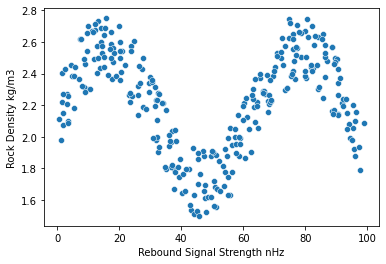

In [ ]:
sns.scatterplot(data =df, x='Rebound Signal Strength nHz', y='Rock Density kg/m3')

**Here,as we can see that this is a sinosuidol relation between features and labels** 

In [ ]:
x=df['Rebound Signal Strength nHz'].values.reshape(-1,1)
y=df['Rock Density kg/m3'].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_preds = model.predict(X_test)

In [ ]:
model_preds

array([[2.23677119],
       [2.20970069],
       [2.22783457],
       [2.22977621],
       [2.2217074 ],
       [2.20554045],
       [2.21733989],
       [2.23793703],
       [2.22927442],
       [2.23668475],
       [2.21906301],
       [2.20614184],
       [2.21549894],
       [2.21832078],
       [2.21081993],
       [2.23266776],
       [2.23121143],
       [2.23531968],
       [2.22855625],
       [2.2282293 ],
       [2.23735453],
       [2.22609925],
       [2.23174767],
       [2.23534457],
       [2.21719859],
       [2.21530785],
       [2.21919176],
       [2.22086182],
       [2.2079445 ],
       [2.21011411],
       [2.21129521],
       [2.21563332],
       [2.20952651],
       [2.21953688],
       [2.22584566],
       [2.21915351],
       [2.23550111],
       [2.22447941],
       [2.22706067],
       [2.21412205],
       [2.21325758],
       [2.22962443],
       [2.21557876],
       [2.23168476],
       [2.21201089],
       [2.22977892],
       [2.21320954],
       [2.222

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(y_test,model_preds)

0.2369211828242143

In [ ]:
mean_squared_error(y_test,model_preds)

0.08573266085277202

In [ ]:
np.sqrt(mean_squared_error(y_test,model_preds))

0.2928014017261052

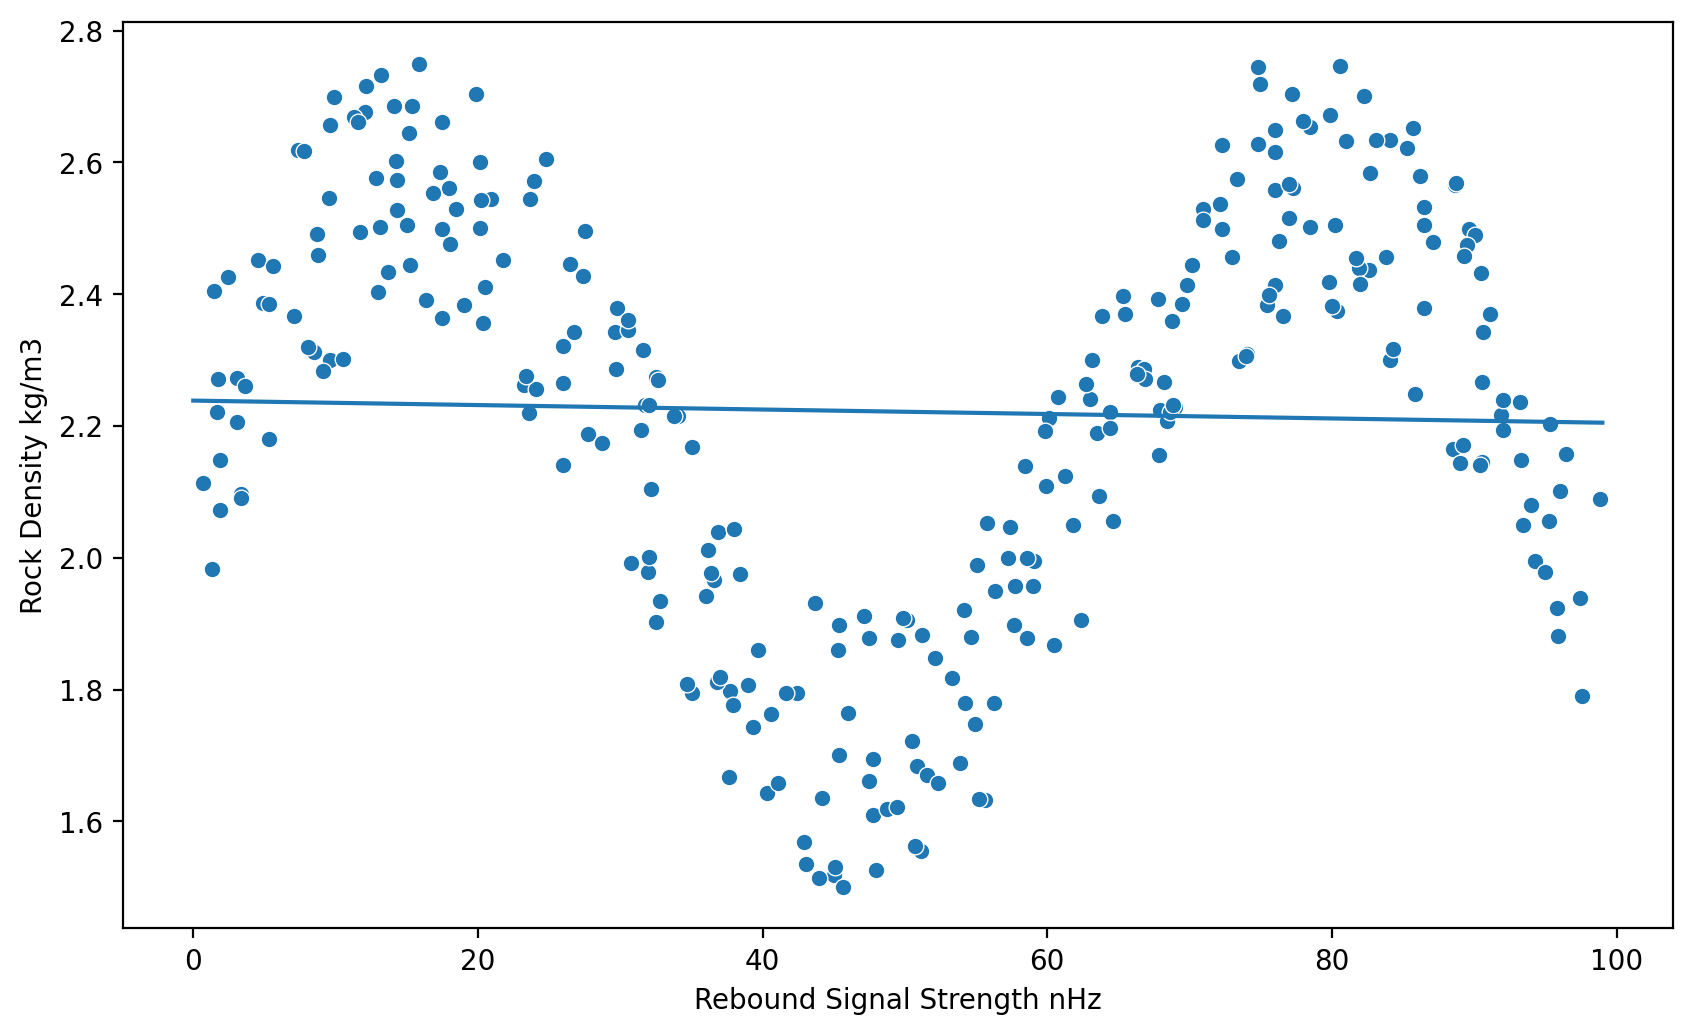

In [ ]:
 signal_range = np.arange(0,100)
 model_preds = model.predict(signal_range.reshape(-1,1))
 plt.figure(figsize=(10,6),dpi = 200)
 sns.scatterplot(x='Rebound Signal Strength nHz',y ='Rock Density kg/m3',data =df)
 plt.plot(signal_range,model_preds)

In [ ]:
def run_model(model,X_train, y_train, X_test, y_test):
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(preds,y_test))
  mae= mean_absolute_error(preds,y_test)
  
  print(f'RMSE:{rmse}')
  print(f'MAE:{mae}')


  signal_range = np.arange(0,100)
  model_preds = model.predict(signal_range.reshape(-1,1))
  plt.figure(figsize=(6,4),dpi = 200)
  sns.scatterplot(x='Rebound Signal Strength nHz',y ='Rock Density kg/m3',data =df)
  plt.plot(signal_range,model_preds)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [ ]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

RMSE:0.13328108700000293
MAE:0.11503327370345316


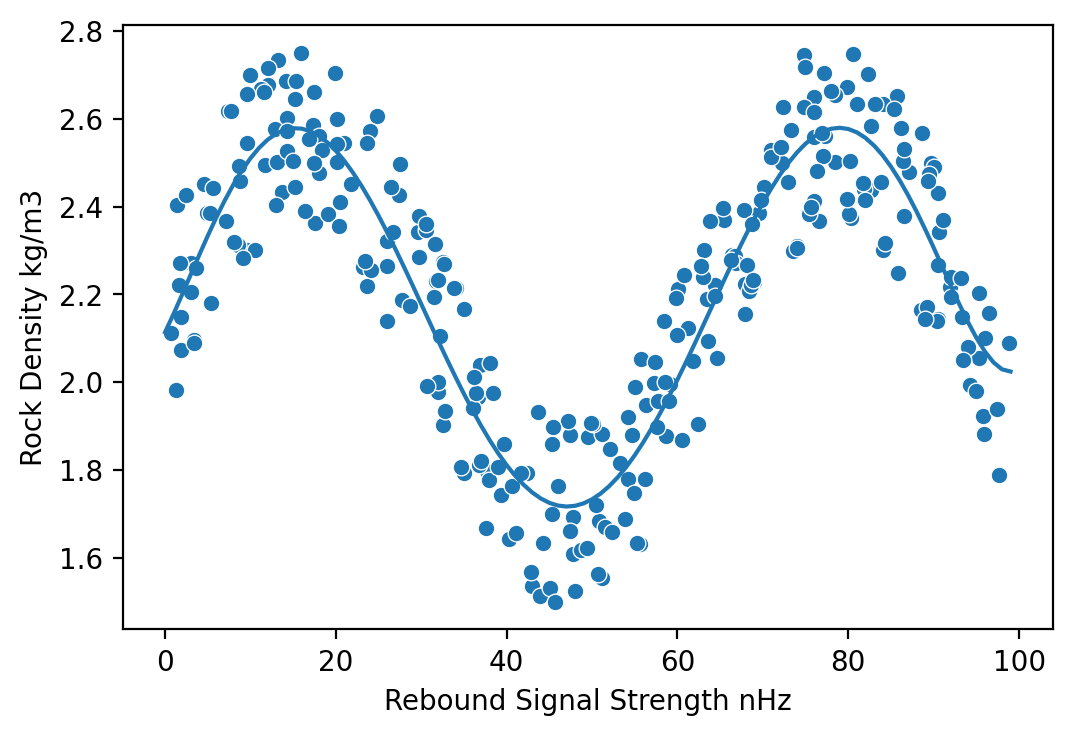

In [ ]:
run_model(pipe , X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svr = SVR()
param_grids = {'C':[0.1,0.5,1,1.5,2,2.6,4.5,5.6,10,20,50,100],
               'gamma':['auto','scale']}





grid = GridSearchCV(svr,param_grids)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE:0.13237535458161145
MAE:0.11408242011017405


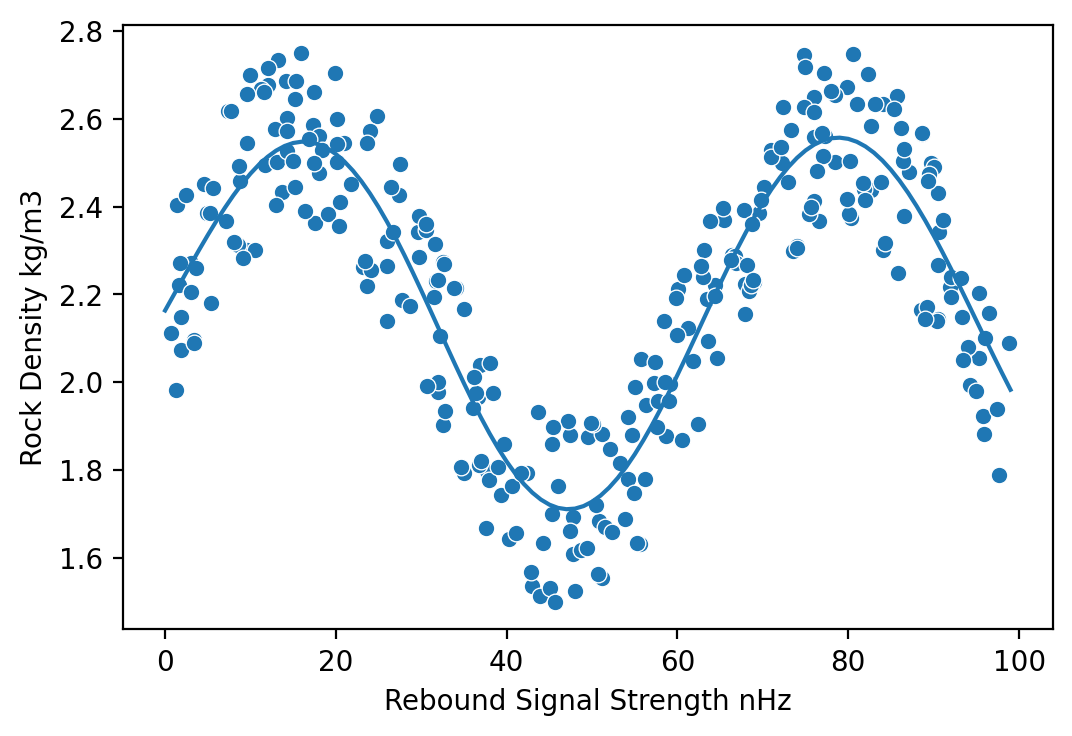

In [ ]:
run_model(svr,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

RMSE:0.16153547162673088
MAE:0.12817936228823254
RMSE:0.14472002981763873
MAE:0.11860352969168181
RMSE:0.1400166117231861
MAE:0.11823219946159096
RMSE:0.1424180281745784
MAE:0.12002666348435241
RMSE:0.14080507415037508
MAE:0.12059189553582521


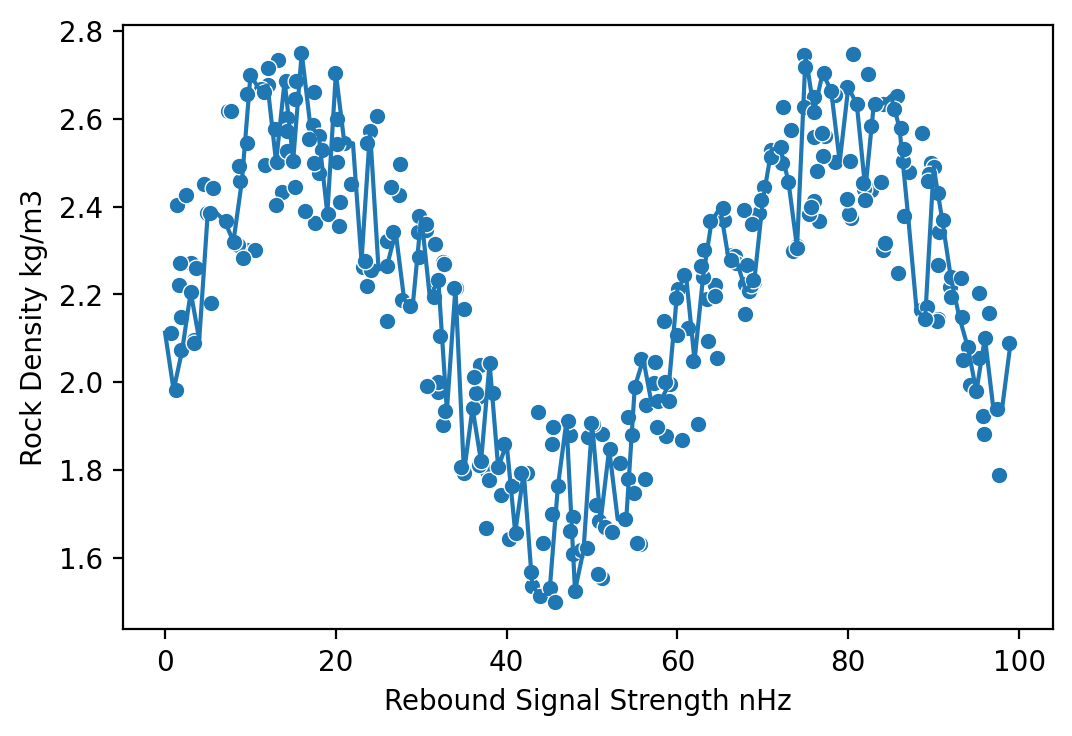

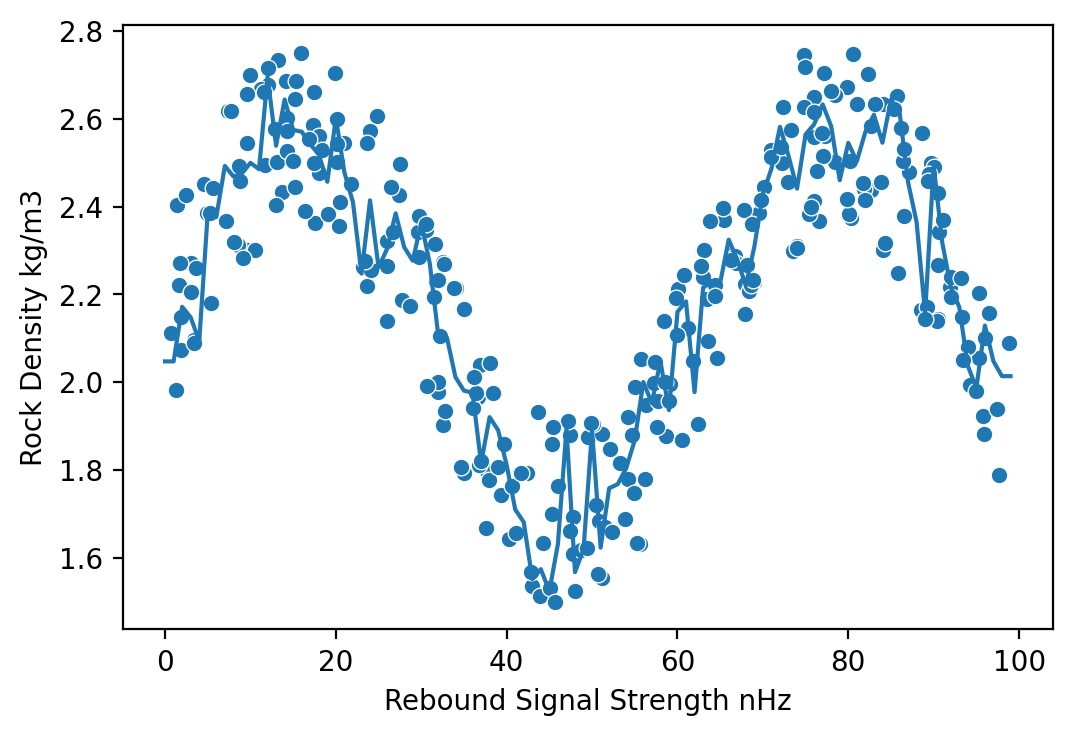

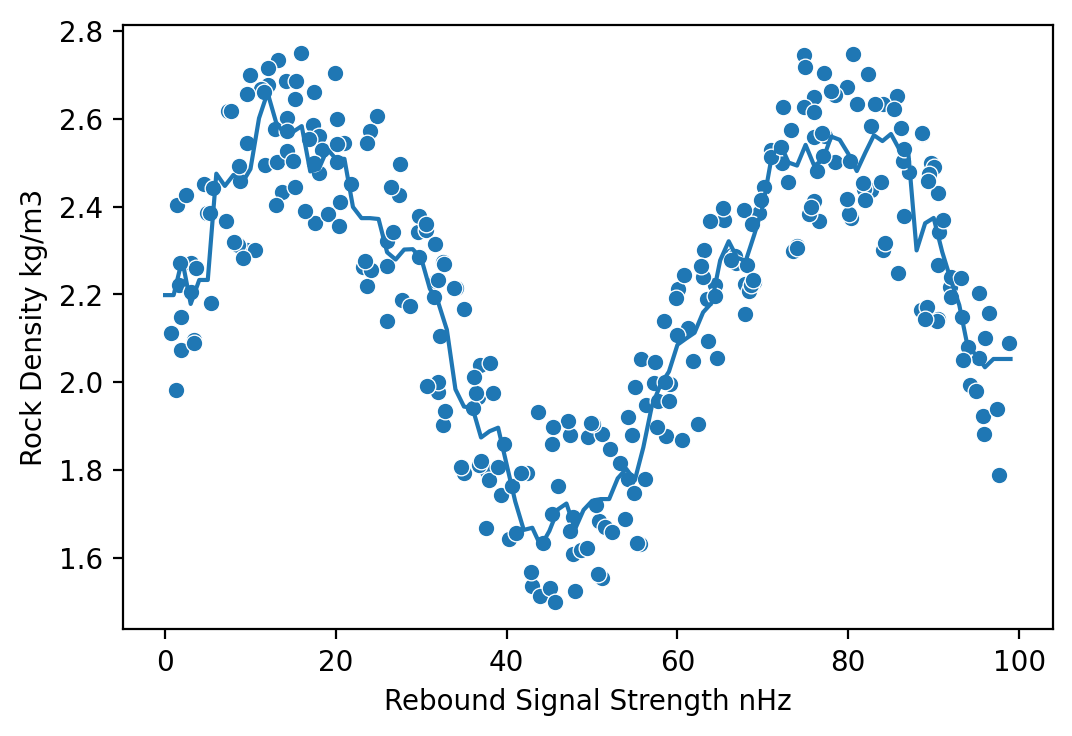

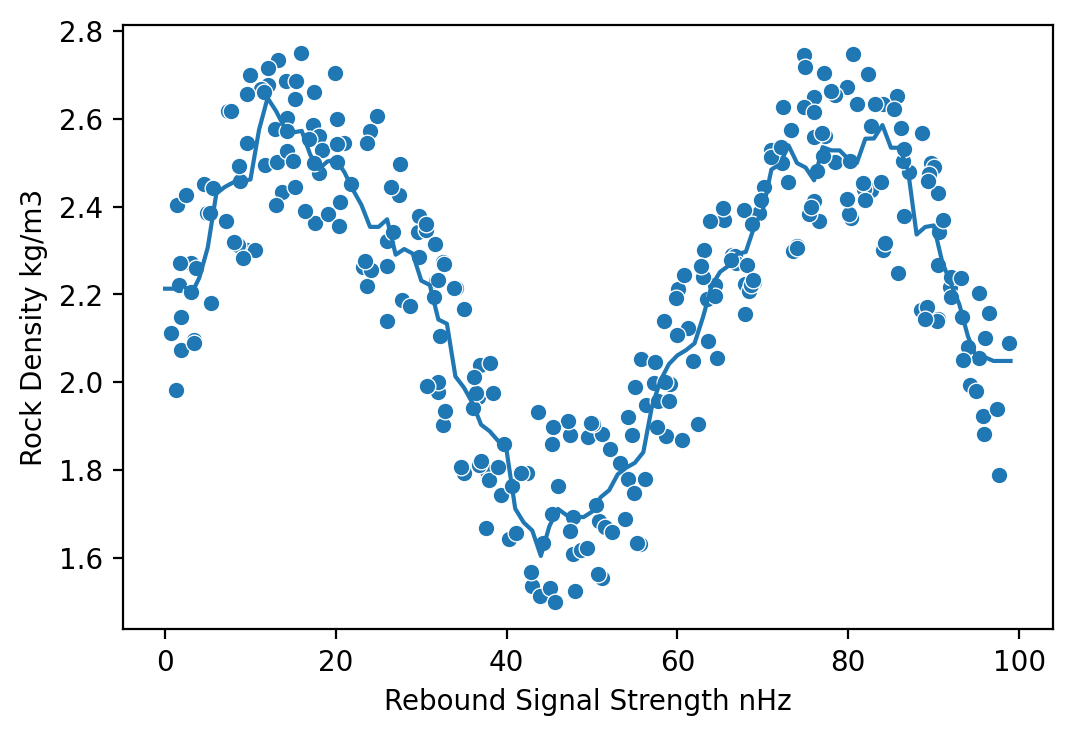

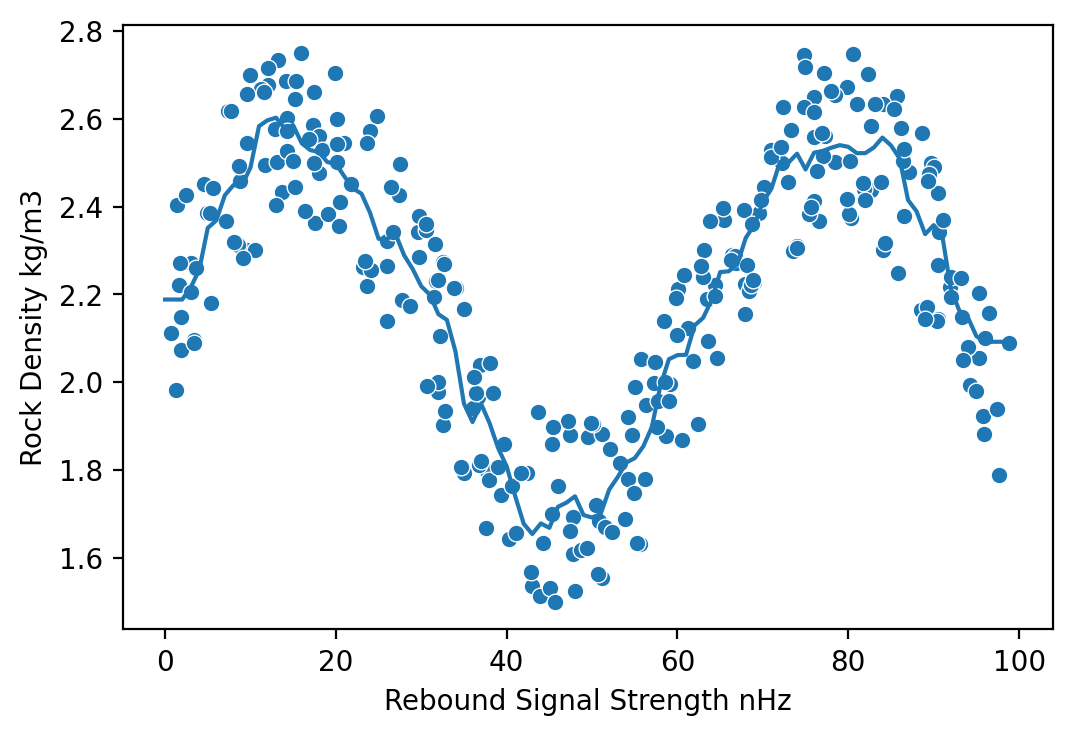

In [ ]:
K_values = [1,2,5,7,10]
for n in K_values:
   model = KNeighborsRegressor(n_neighbors=n)
   run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

RMSE:0.16153547162673088
MAE:0.12817936228823254


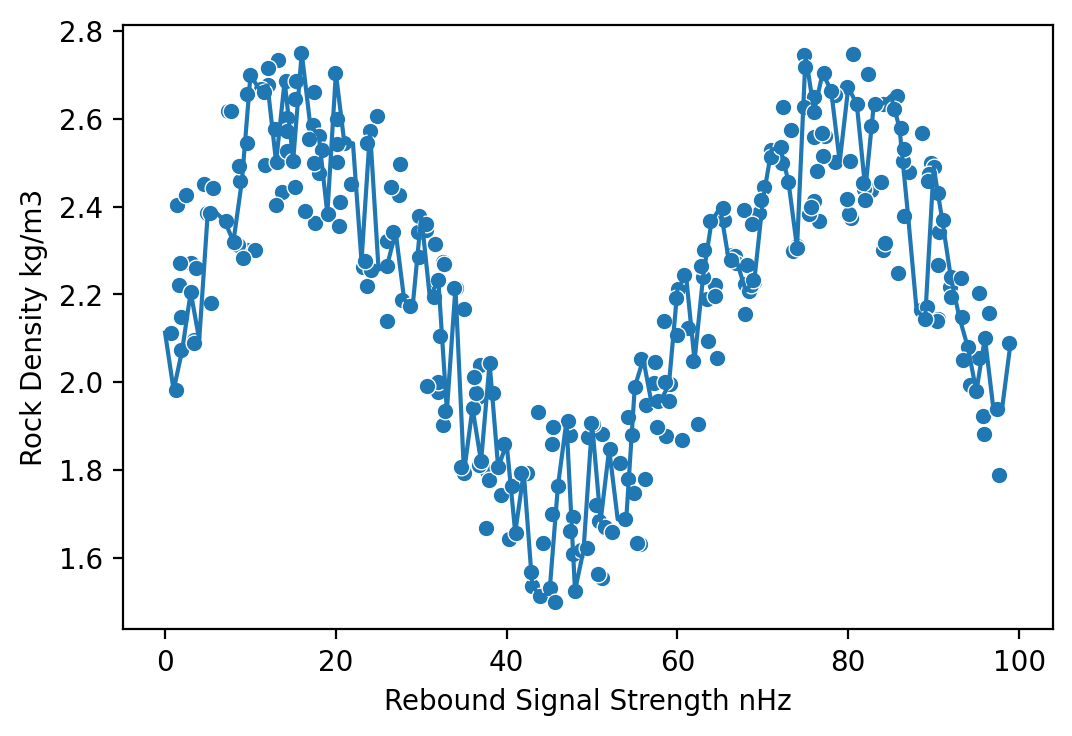

In [ ]:
run_model(tree,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(n_estimators=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE:0.1459299874566709
MAE:0.11824471893057237


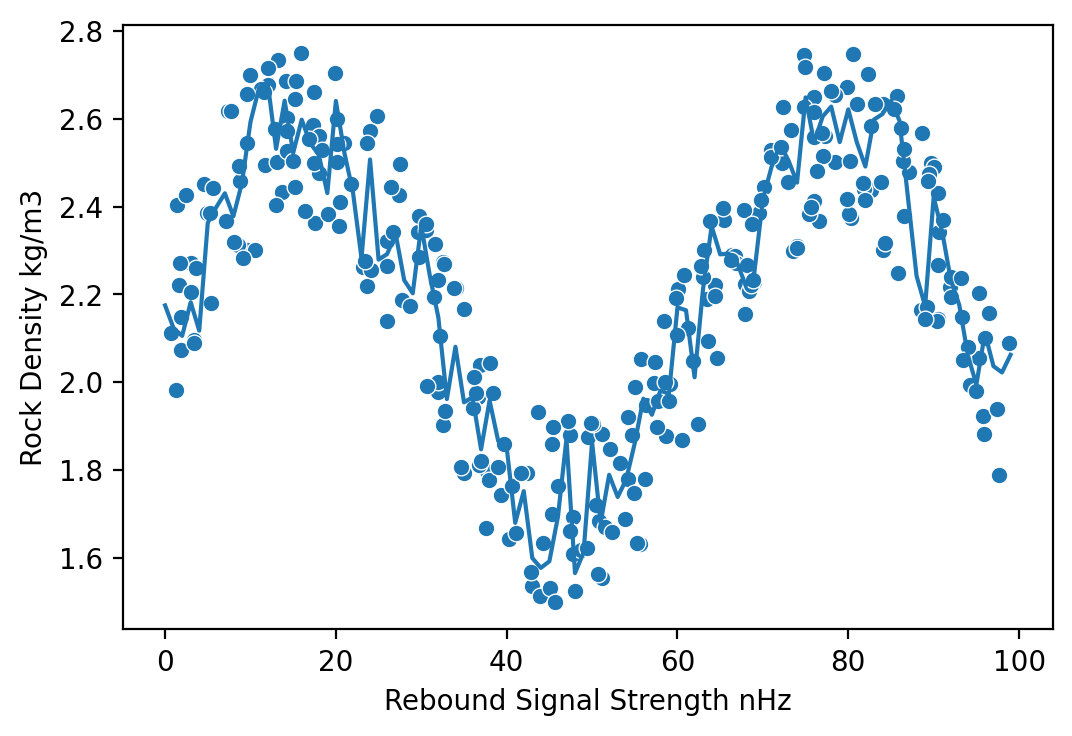

In [ ]:
run_model(rfr,X_train,y_train,X_test,y_test)